In [4]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#importing the training and test datasets
train_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

test_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/57854a33a5a8eebbfbf387a6a7cb20b66bd7a2d0/bigdatamart_Test.csv')

In [6]:
#lets take a look at our training data
train_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Now the test dataset
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
#Checking the columns in Training dataset......
print("Columns in training dataset based on datatypes {}".format(train_df.columns.to_series().groupby(train_df.dtypes).groups))


Columns in training dataset based on datatypes {int64: ['Outlet_Establishment_Year'], float64: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], object: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']}


In [13]:
#Checking the dimensions
train_df.shape


(8523, 12)

In [14]:
#Checking missing values..............
train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Looks like missing values are in Item_Weight(17.2%) and Outlet_Size(28.3%).


In [15]:
train_df['Item_Weight']=train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())


In [16]:
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])


<AxesSubplot:>

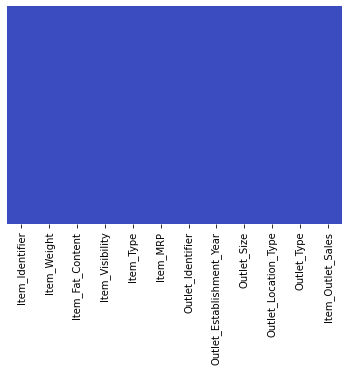

In [17]:
#Lets check whether we still have missing values in our dataset!!
import seaborn as sns
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [18]:
train_df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:>

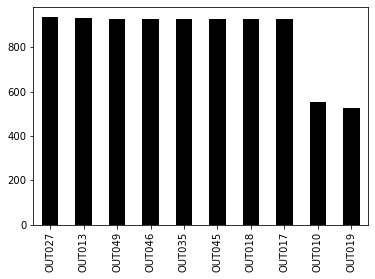

In [20]:
#Now we are visualizing the "Outlet_Identifier"
train_df['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Black')


In [21]:
train_df = train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
train_df.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
#checking the individual Object Variables

Item_Fat_Content

<AxesSubplot:>

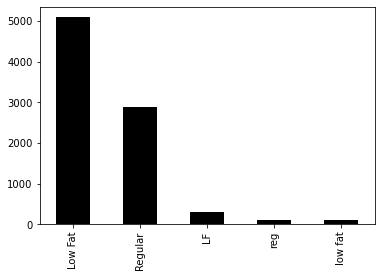

In [23]:
#Visualizing the "Item_Fat_Content"
train_df['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'black')


LF,low fat = Low Fat


reg = Regular



In [24]:
train_df =  train_df.replace(to_replace ="low fat",  value ="Low Fat") 
train_df =  train_df.replace(to_replace ="LF",  value ="Low Fat") 
train_df =  train_df.replace(to_replace ="reg",  value ="Regular") 


<AxesSubplot:>

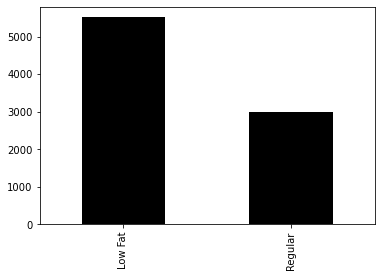

In [26]:
#Visualizing the "Item_Fat_Content"
train_df['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Black')


Item Type



<AxesSubplot:>

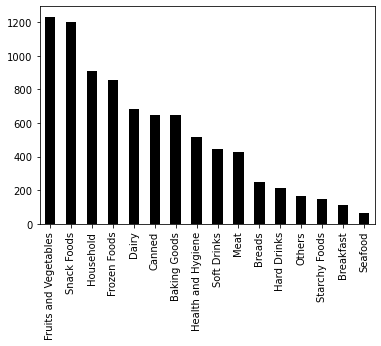

In [28]:
#Visualizing the "Item_Type"
train_df['Item_Type'].value_counts().plot(kind='bar',color = 'Black')

Outlet Size

<AxesSubplot:>

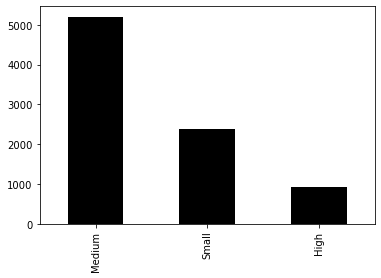

In [29]:
#Visualizing the "Outlet_Size"
train_df['Outlet_Size'].value_counts().plot(kind='bar',color = 'Black')


Outlet Location Type



<AxesSubplot:>

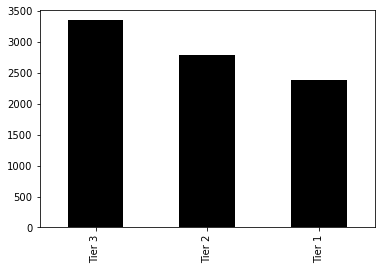

In [30]:
#Visualizing the "Outlet_Location_Type"
train_df['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'black')

Outlet Type

<AxesSubplot:>

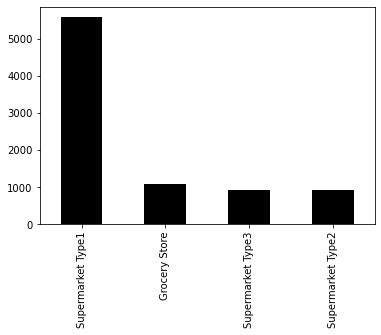

In [32]:
#Visualizing the "Outlet_Type"
train_df['Outlet_Type'].value_counts().plot(kind='bar',color = 'black')


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

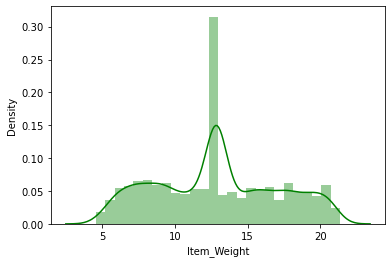

In [33]:
#checking the individual Int/float Variables
y = train_df['Item_Weight']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

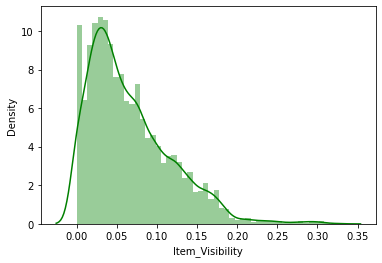

In [34]:
y = train_df['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

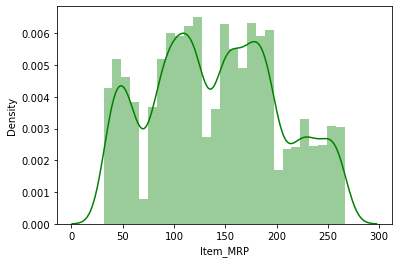

In [35]:
y = train_df['Item_MRP']
plt.figure(1);
sns.distplot(y, kde=True,color = 'green')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

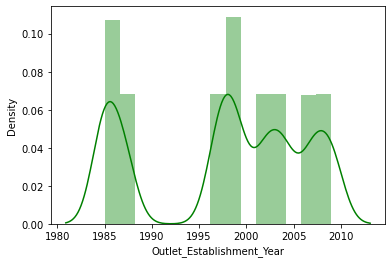

In [37]:
y = train_df['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

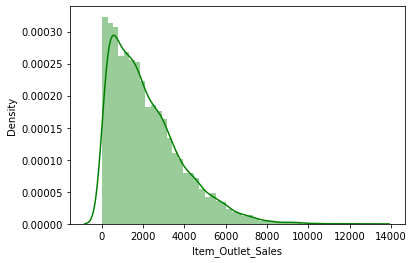

In [38]:
y = train_df['Item_Outlet_Sales']
plt.figure(1);
sns.distplot(y, kde=True,color = 'green')

In [41]:
train_df["Qty_Sold"] = (train_df["Item_Outlet_Sales"]/train_df["Item_MRP"])
train_df.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


<AxesSubplot:>

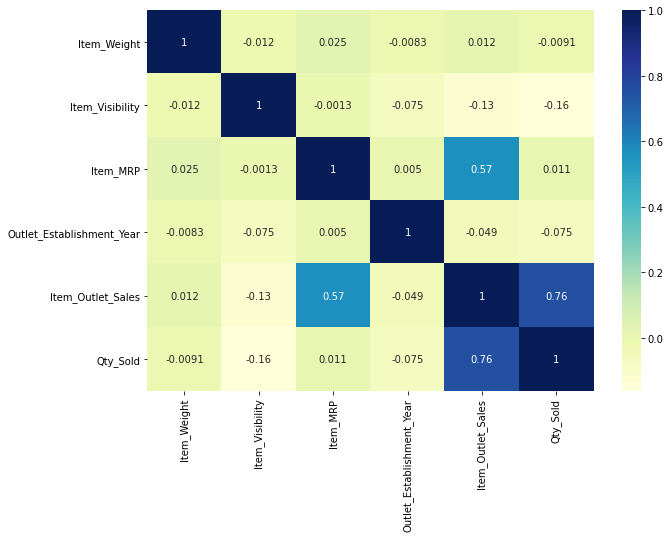

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")


In [43]:
categorical_columns=[x for x in train_df.dtypes.index if train_df.dtypes[x]=='object']
categorical_columns


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
train_df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [46]:
#print frequencies of these categories
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(train_df[col].value_counts())
    print("\n")

Frequency of categories for variable
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Frequency of categories for variable
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Frequency of categories for variable
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Frequency of categories for variable
Supermarket Type1    5577
Grocery Store        1083
Supermarket T

In [47]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train_df.columns:
    train_df[col] = labelencoder.fit_transform(train_df[col])


In [48]:
#Now one hot encoding
train_df=pd.get_dummies(train_df, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(train_df.shape)


(8523, 34)


In [49]:
train_df.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Qty_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [50]:
#Rearrangement of the columns......

df = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales', 'Qty_Sold']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales,Qty_Sold
0,284,664,5592,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2540,4084
1,57,880,473,8,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,422,2217
2,376,715,2901,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1639,3972
3,393,0,4227,3,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,670,1119
4,265,0,627,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,865,5315


In [51]:
df.shape

(8523, 34)

In [52]:
# iterating the columns 
for col in df.columns: 
    print(col)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Fat_Content_0
Item_Fat_Content_1
Item_Type_0
Item_Type_1
Item_Type_2
Item_Type_3
Item_Type_4
Item_Type_5
Item_Type_6
Item_Type_7
Item_Type_8
Item_Type_9
Item_Type_10
Item_Type_11
Item_Type_12
Item_Type_13
Item_Type_14
Item_Type_15
Outlet_Size_0
Outlet_Size_1
Outlet_Size_2
Outlet_Location_Type_0
Outlet_Location_Type_1
Outlet_Location_Type_2
Outlet_Type_0
Outlet_Type_1
Outlet_Type_2
Outlet_Type_3
Item_Outlet_Sales
Qty_Sold


In [54]:
#Separating features and label
X = df.iloc[:,0:33].values
y = df.iloc[:,-1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [56]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[6.10394230e-01 3.35737063e-01 5.28963051e-02 9.71299848e-04
 8.05715240e-07 6.86337627e-08 5.01485081e-08 2.85864445e-08
 2.58976441e-08 1.90387610e-08 1.50603608e-08 1.29257303e-08
 1.03976730e-08 9.65145933e-09 8.33101886e-09 8.09467669e-09
 6.72391989e-09 6.41505808e-09 5.74725453e-09 5.10424209e-09
 3.35510208e-09 2.72304646e-09 2.25800042e-09 1.95947055e-09
 1.65075968e-09 1.40224435e-09 8.96373832e-10 5.79551476e-10
 3.94593426e-33 3.94593426e-33 3.94593426e-33 3.94593426e-33
 3.94593426e-33]


In [57]:
len(explained_variance)

33

In [58]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.6103942302780857, 0.3357370634408, 0.05289630513664151, 0.0009712998481694158, 8.057152404511919e-07, 6.863376274915182e-08, 5.014850813765984e-08, 2.858644446155582e-08, 2.589764412221038e-08, 1.903876098556517e-08, 1.5060360831309706e-08, 1.2925730268760933e-08, 1.0397672985758931e-08, 9.651459329541178e-09, 8.331018856622104e-09, 8.09467668974726e-09, 6.7239198935770456e-09, 6.4150580792975455e-09, 5.747254534657553e-09, 5.1042420871578415e-09, 3.355102078822889e-09, 2.723046460474659e-09, 2.2580004207552015e-09, 1.9594705478590674e-09, 1.6507596848020018e-09, 1.4022443462833684e-09, 8.963738320443751e-10, 5.79551476265282e-10, 3.945934259712649e-33, 3.945934259712649e-33, 3.945934259712649e-33, 3.945934259712649e-33, 3.945934259712637e-33]


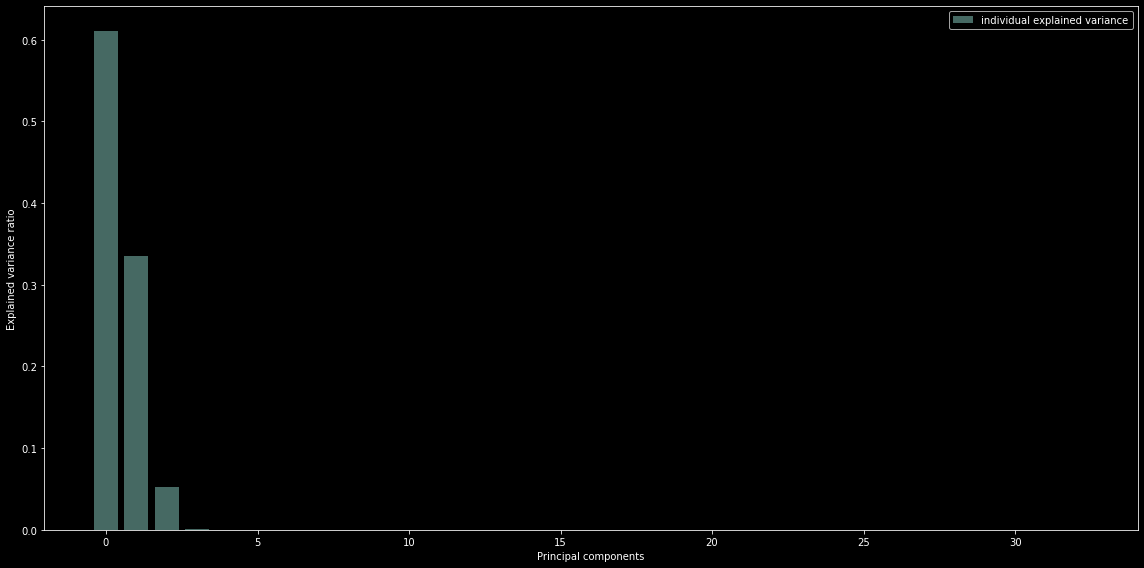

In [59]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 8))
    
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [60]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.61039423 0.33573706 0.05289631]


In [61]:
#Model comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor


In [62]:
#Decision_tree
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [63]:
#Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
#Random_forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [66]:
#Gradient_Regressor........
Gradient_boosting = GradientBoostingRegressor()
Gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor()

In [10]:
#Checking the columns in Training dataset......
print("Columns in training dataset based on datatypes {}".format(df_train.columns.to_series().groupby(df_train.dtypes).groups))


NameError: name 'df_train' is not defined